<a href="https://colab.research.google.com/github/gitmav1-eq/Sales-and-Profitability-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
orders = pd.read_csv('/content/List_of_Orders_55FFC79CF8.csv')
order_details = pd.read_csv('/content/Order_Details_19795F61CF.csv')
sales_target = pd.read_csv('/content/Sales_target_DD2E9B96A0.csv')

In [4]:
# Standardize column names
orders.columns = orders.columns.str.strip()
order_details.columns = order_details.columns.str.strip()
sales_target.columns = sales_target.columns.str.strip()

In [5]:
# Merge List of Orders and Order Details on Order ID
merged_data = pd.merge(orders, order_details, on='Order ID', how='inner')

In [6]:
# Calculate total sales and profit metrics
total_sales = merged_data.groupby('Category', as_index=False).agg(
    Total_Sales=('Amount', 'sum'),
    Average_Profit_Per_Order=('Profit', 'mean')
)
merged_data['Profit Margin'] = np.where(merged_data['Amount'] > 0, merged_data['Profit'] / merged_data['Amount'] * 100, 0)
total_sales['Total_Profit_Margin'] = merged_data.groupby('Category')['Profit Margin'].mean().values


In [7]:
# Identify performance categories
top_performing = total_sales.nlargest(3, 'Total_Sales')
underperforming = total_sales.nsmallest(3, 'Total_Sales')

<ipython-input-8-69c63ced0142>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total_Sales', data=total_sales, palette='viridis')


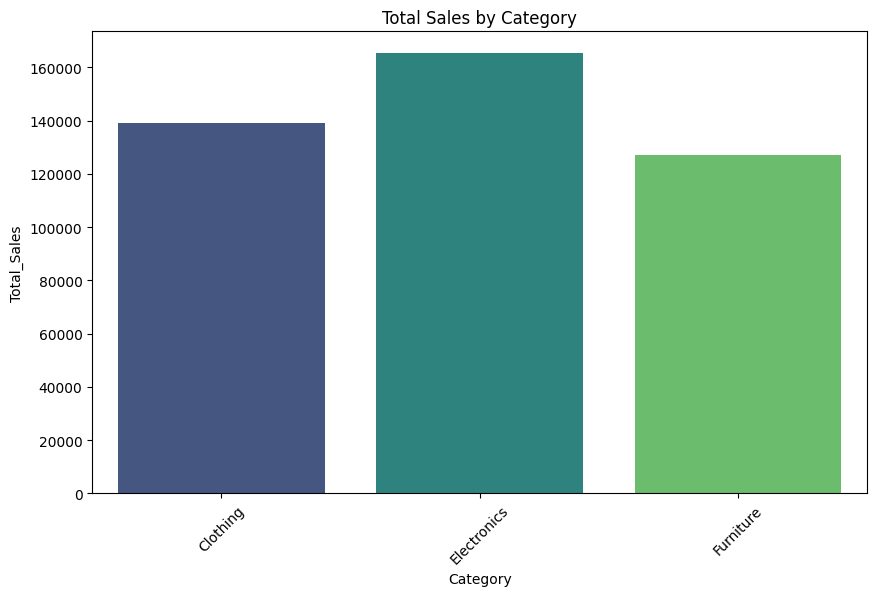

In [8]:
# Visualizing sales trends
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total_Sales', data=total_sales, palette='viridis')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Debug missing columns
print("Columns in sales_target dataset:", sales_target.columns)

Columns in sales_target dataset: Index(['Month of Order Date', 'Category', 'Target'], dtype='object')


In [9]:
# Ensure 'Month' column exists
if 'Month' in sales_target.columns:
    sales_target['Month'] = pd.to_datetime(sales_target['Month'], errors='coerce')
    sales_target.dropna(subset=['Month'], inplace=True)
    sales_target.sort_values(by='Month', inplace=True)
    sales_target['Furniture_Target_Change'] = sales_target['Furniture'].pct_change() * 100
    significant_fluctuations = sales_target[sales_target['Furniture_Target_Change'].abs() > 10]
else:
    significant_fluctuations = pd.DataFrame()
    print("Warning: 'Month' column not found in sales_target dataset.")

In [10]:
# Debug missing columns
print("Columns in orders dataset:", orders.columns)
print("Columns in order_details dataset:", order_details.columns)

Columns in orders dataset: Index(['Order ID', 'Order Date', 'CustomerName', 'State', 'City'], dtype='object')
Columns in order_details dataset: Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category'], dtype='object')


In [16]:
# Ensure required columns exist before aggregation
if 'Amount' in merged_data.columns and 'Profit' in merged_data.columns:
    top_states = merged_data['State'].value_counts().head(5).index.tolist()
    regional_performance = merged_data[merged_data['State'].isin(top_states)].groupby('State', as_index=False).agg(
        Total_Sales=('Amount', 'sum'), Average_Profit=('Profit', 'mean') )
else:
    regional_performance = pd.DataFrame()
    print("Warning: 'Amount' or 'Profit' column not found in merged dataset.")

<ipython-input-14-3596ac57b162>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Total_Sales', data=regional_performance, palette='coolwarm')


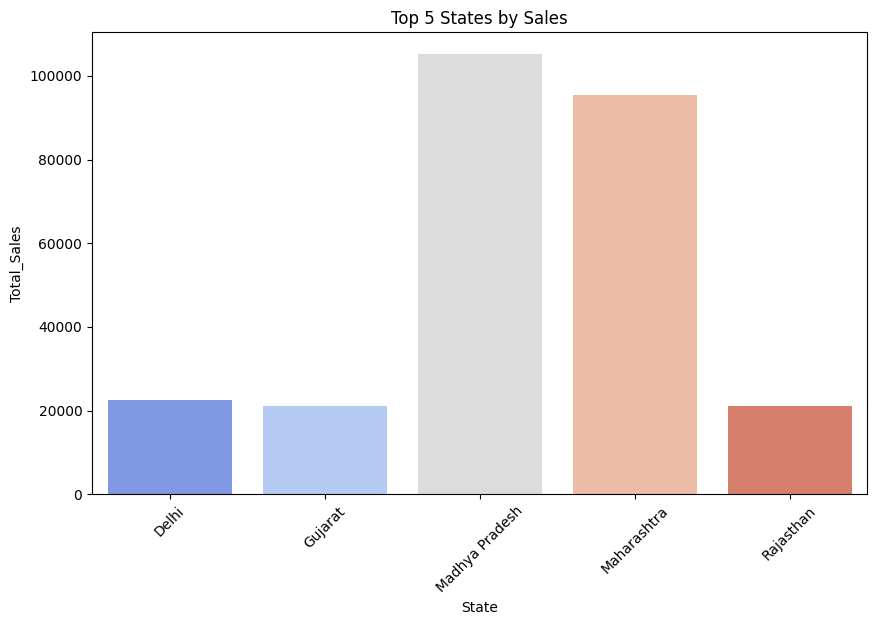

In [14]:
# Visualizing regional performance
if not regional_performance.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='State', y='Total_Sales', data=regional_performance, palette='coolwarm')
    plt.title('Top 5 States by Sales')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# Output results
print("Total Sales per Category:")
print(total_sales)
print("\nTop Performing Categories:")
print(top_performing)
print("\nUnderperforming Categories:")
print(underperforming)
print("\nSignificant Target Fluctuations for Furniture:")
print(significant_fluctuations[['Month', 'Furniture_Target_Change']] if not significant_fluctuations.empty else "No significant fluctuations found.")
print("\nRegional Performance for Top 5 States:")
print(regional_performance if not regional_performance.empty else "No regional performance data available.")

Total Sales per Category:
      Category  Total_Sales  Average_Profit_Per_Order  Total_Profit_Margin
0     Clothing     139054.0                 11.762908             4.132921
1  Electronics     165267.0                 34.071429            -0.622928
2    Furniture     127181.0                  9.456790            -6.788811

Top Performing Categories:
      Category  Total_Sales  Average_Profit_Per_Order  Total_Profit_Margin
1  Electronics     165267.0                 34.071429            -0.622928
0     Clothing     139054.0                 11.762908             4.132921
2    Furniture     127181.0                  9.456790            -6.788811

Underperforming Categories:
      Category  Total_Sales  Average_Profit_Per_Order  Total_Profit_Margin
2    Furniture     127181.0                  9.456790            -6.788811
0     Clothing     139054.0                 11.762908             4.132921
1  Electronics     165267.0                 34.071429            -0.622928

Significant Targ